In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def gaussian_noise(mean, std, row, col, past_image):
    # Gaussian noise는 정규 분포 기반이므로 np.random.normal 사용
    noise = np.random.normal(mean, std, (row, col, 3))
    noise_image = past_image + noise
    return np.clip(0, 255, noise_image).astype(np.uint8) 

In [5]:
def mean_filter(size, image):
    filter = np.ones((size, size), np.float32) / (size*size)
    return cv2.filter2D(image, -1, filter)

In [6]:
def psnr1(ground_truth, image): # 전체 channel 통합으로 PSNR 구하는 방법
    error = np.mean((ground_truth - image) ** 2)
    return 10*np.log10((255*255) / error)

In [7]:
def psnr2(ground_truth, image): # 각 Channel 별로 PSNR 구하는 방법
    psnrs = []
    for i in range(3):
        error = np.mean((ground_truth[:, :, i] - image[:, :, i]) ** 2)
        psnr = 10 * np.log10((255 * 255) / error)
        psnrs.append(psnr)
    return psnrs

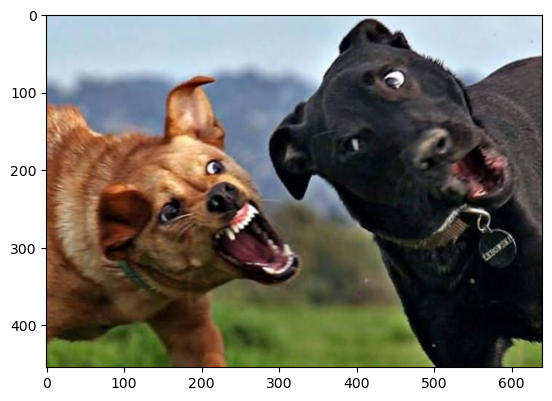

In [13]:
raw_image = cv2.imread('image.jpg')
# opencv와 matplot의 색처리 방식이 달라서 BGR to RGB 변환 
image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)
row = image.shape[0] //455
col = image.shape[1] //640
plt.imshow(image)

27.946735359900376
[27.948637925496694, 27.93642747123089, 27.955161511011116]


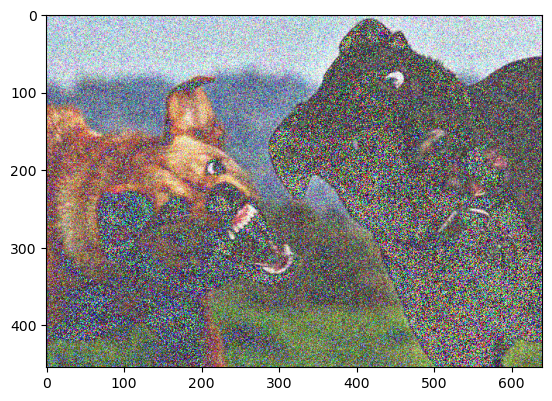

In [9]:
gaussian_added_image = gaussian_noise(0, 50, 455, 640, image)
print(psnr1(image, gaussian_added_image))
print(psnr2(image, gaussian_added_image))
plt.imshow(gaussian_added_image)

28.3664268131352
[28.495341582262274, 28.41940304557179, 28.19036943682733]


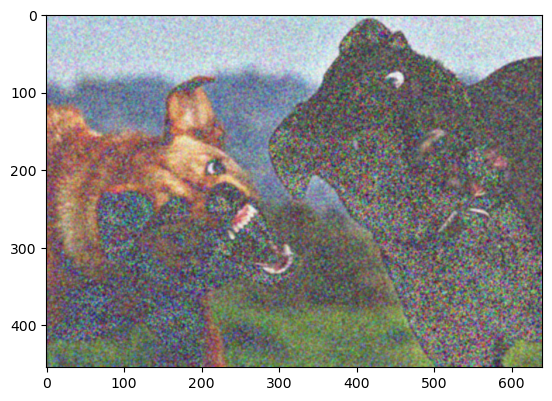

In [10]:
filtered_image3 = mean_filter(3, gaussian_added_image)
print(psnr1(image, filtered_image3))
print(psnr2(image, filtered_image3))
plt.imshow(filtered_image3)

28.55568186059643
[28.8720040478518, 28.6749574305247, 28.152281276835886]


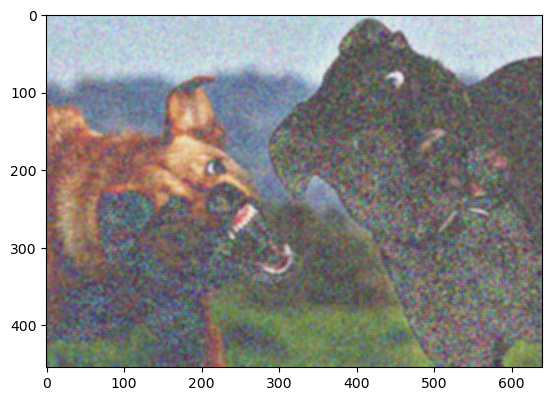

In [11]:
filtered_image5 = mean_filter(5, gaussian_added_image)
print(psnr1(image, filtered_image5))
print(psnr2(image, filtered_image5))
plt.imshow(filtered_image5)

28.6366880492495
[29.0723323878996, 28.795228370815256, 28.10094568046507]


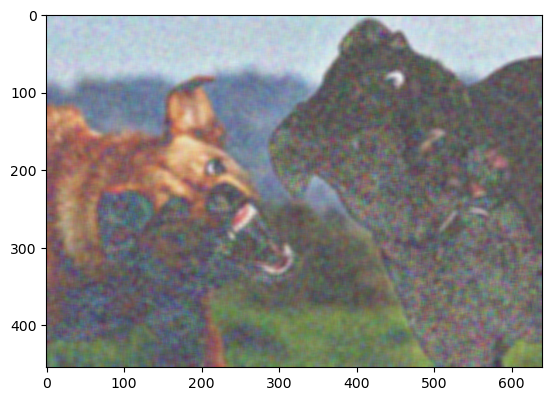

In [12]:
filtered_image7 = mean_filter(7, gaussian_added_image)
print(psnr1(image, filtered_image7))
print(psnr2(image, filtered_image7))
plt.imshow(filtered_image7)